
  <h1 class="display-3">Loss Estimation of Car Loan in Python</h1>
  <h3>Using Linear Regression with Stats Model package</h3>
  
<hr>
<h3> Terminology: How Losses happen from Loan? </h3>
Customer first applies for a loan after that company validates the customer eligibility for a loan. In case the borrower doesn’t pay back the loan, the losses are to be incurred by the bank.

<h3> Problem </h3>
To automate the loss estimation based on customer detail provided while applying for loan. These details are Age, Years of Experience, Number of cars, Gender, Marital Status. We have given the data of customers who are defaulter, those are eligible for loan amount. And we have to predict what features are leading to defaults up to which amount. Here are the details about the data set.

<h3> Data Variables and Description </h3>
<table>
 <tr> <th align="left">Variable</th> <th align="left">Description</th> </tr>
 <tr> <td>Ac_No</td> <td>The account of customer used as identifier</td> </tr>
 <tr> <td>Age</td> <td>Age of borrower (16-70)</td> </tr>
 <tr> <td>Years of Experience</td> <td>Working experience (0-53)</td> </tr>
 <tr> <td>Number of Cars</td> <td>Number of Possessed cars (1, 2, 3, 4)</td> </tr>
 <tr> <td>Gender</td> <td>Male/Female</td> </tr>
 <tr> <td>Married</td> <td>Married/Single</td> </tr>
 <tr> <td>Loss in Thousands	</td> <td>Target Variable : Loss Ammount</td> </tr>			
</table>

<h3> Given Dataset File</h3>
* [Loss_Data](https://github.com/D-Satyajit/iMarticus-Projects/blob/master/Datasets/Loss.csv)

<a id="head"></a>

## Index
 - [Importing Datasets](#ImportingDatasets)
 - [Finding NULL Values](#FindNULLVal) 
 - [Counting Levels in Datasets](#CountDSLevels) 
 - [Treating NULL Values & Converting Variables into 0's and 1's](#TreatNULLVal) 
 - [Plot and Graphs](#Plots) 
 - [Linear Regression](#linearreg) 
 - [Winsorization](#winsorization) 
 - [Assumptions](#assumptions) 
 - [Conclusion](#conclusion) 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split

import pylab as pl

<a id="ImportingDatasets"></a>
# Importing Dataset
<hr>

In [70]:
# Importing Train Datset
loss_data = pd.read_csv("F:/Lectures/Data Science/iMarticus/Python/Project/Datasets/Loss.csv")
loss_data = pd.DataFrame(loss_data)
loss_data.shape # Shape gives you total number of observations and variables present in datasets

(15290, 7)

In [71]:
loss_data.info() # Info gives you name of each variable with the data type associated with it.
loss_data.head(3) # Head gives you first few rows of the dataset. (3 is the nummber of rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096


**We will be fixing the column names with underscore, the column name with space is not proper method and pandas will find difficult to read it.**

In [72]:
loss_data.columns

Index(['Ac_No', 'Age', 'Years of Experience', 'Number of Vehicles', 'Gender',
       'Married', 'Losses in Thousands'],
      dtype='object')

In [73]:
loss_data.columns = ['Ac_No', 'Age', 'Years_of_Experience', 'Number_of_Vehicles', 'Gender','Married', 'Losses_in_Thousands']

In [74]:
loss_data.head(2)

,Ac_No,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302


<a id="FindNULLVal"></a>
# Finding NULL Values
<hr>

In [75]:
loss_data.isnull().sum() # Gives Variable wise NaN values

Ac_No                  0
Age                    0
Years_of_Experience    0
Number_of_Vehicles     0
Gender                 0
Married                0
Losses_in_Thousands    0
dtype: int64

In [76]:
loss_data.isnull().sum().sum()

0

It seems there are no NaN values present in the given dataset. <br>
**But before proceeding further we will be deleting the unwanted variable : Ac_No**

In [77]:
loss_data = loss_data.drop(['Ac_No'], 1) # Note: axis=1 denotes that we are referring to a column, not a row. 0 is for row.

In [78]:
loss_data.head(5)

,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,24,5,1,M,Married,203.319595
1,31,10,1,F,Single,402.197302
2,56,37,1,M,Married,553.132096
3,52,31,1,F,Married,292.430579
4,20,3,1,M,Single,246.540576


<a id="CountDSLevels"></a>
# Counting Levels in Datasets
<hr>

Counting the levels of variables in the dataset is important because it shows the distribution of elements in a categorical variable. In addition to that, it also shows the wrongly entered elements.

In [79]:
loss_data.Number_of_Vehicles.value_counts()

2    5152
3    5095
1    2533
4    2510
Name: Number_of_Vehicles, dtype: int64

In [80]:
loss_data.Gender.value_counts()

F    7747
M    7543
Name: Gender, dtype: int64

In [81]:
loss_data.Married.value_counts()

Married    7783
Single     7507
Name: Married, dtype: int64

Since there are no NaN values and now incorrectly entered variables in the dataset we now will directly move to converting variables into numerical form i.e. 0's and 1's.

<a id="TreatNULLVal"></a>


# Treating NULL Values and Converting Variables into 0's and 1's 
<hr>

### Key

* **Gender**          : Male=1 | Female=0
* **Married** 	      : Single=1 | Married=0


### Categorical Encoding
* The idea is to convert the all categorical variable into 0s, 1s, 2s, etc and into numeric integers. It is always a good practice to convert things into numerical values because it's all about mathematical calculations.
* To do this we have LabelEncoder package from SciKit learn that encodes the labels with the value between **0 and n_classes-1**. Though there are several other [methods](http://pbpython.com/categorical-encoding.html) to do this. [Label Encoder Help](https://chrisalbon.com/machine-learning/convert_pandas_categorical_column_into_integers_for_scikit-learn.html)
* The **fit_transform(y)** function fit label encoder (male/female) and return encoded labels (1/0)
* By default the fit_transform() function will encode the NaN values also. So, we have to take care of them in a best possible way.

In [82]:
# Importing the LabelEncoder Libraries
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [83]:
loss_data['Gender'] = number.fit_transform(loss_data['Gender'].astype('str')) # This makes two levels 0 and 1
loss_data['Married'] = number.fit_transform(loss_data['Married'].astype('str'))

In [84]:
loss_data.head(5)

,Age,Years_of_Experience,Number_of_Vehicles,Gender,Married,Losses_in_Thousands
0,24,5,1,1,0,203.319595
1,31,10,1,0,1,402.197302
2,56,37,1,1,0,553.132096
3,52,31,1,0,0,292.430579
4,20,3,1,1,1,246.540576


<a id="Plots"></a>
# Plot and Graphs 
<hr>

Now, we are going to make some graphs to see the visualization of train dataset. For this I am going to used seaborn package, that is a is a Python visualization library based on matplotlib.[More Info.](https://seaborn.pydata.org/introduction.html#introduction)

## Heatmap

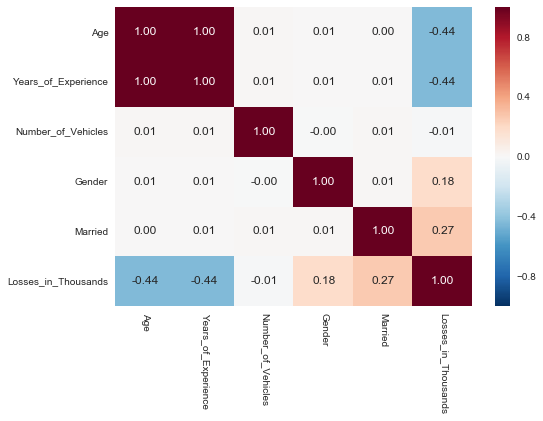

In [85]:
# Calculate correlations Using Heatmap
corr = loss_data.corr()
sns.heatmap(corr, annot=True, fmt="0.2f"); # annot:write the data value in each cell | fmt:String formatting code d=decimal f=float  
plt.xticks(rotation=-90) # Heatmap
plt.show()

The scale shows Pearson Coefficient (-1 to 1), the values near to 1 or -1 have a high correlation. <br>
The heat map clearly shows that there are very fewer correlations between most of the variables and a target variable **Losses_in_Thousands**. Only **Age, Years_of_Experience, and Married** have a good correlation with **Losses_in_Thousands**.

## Pair Plot

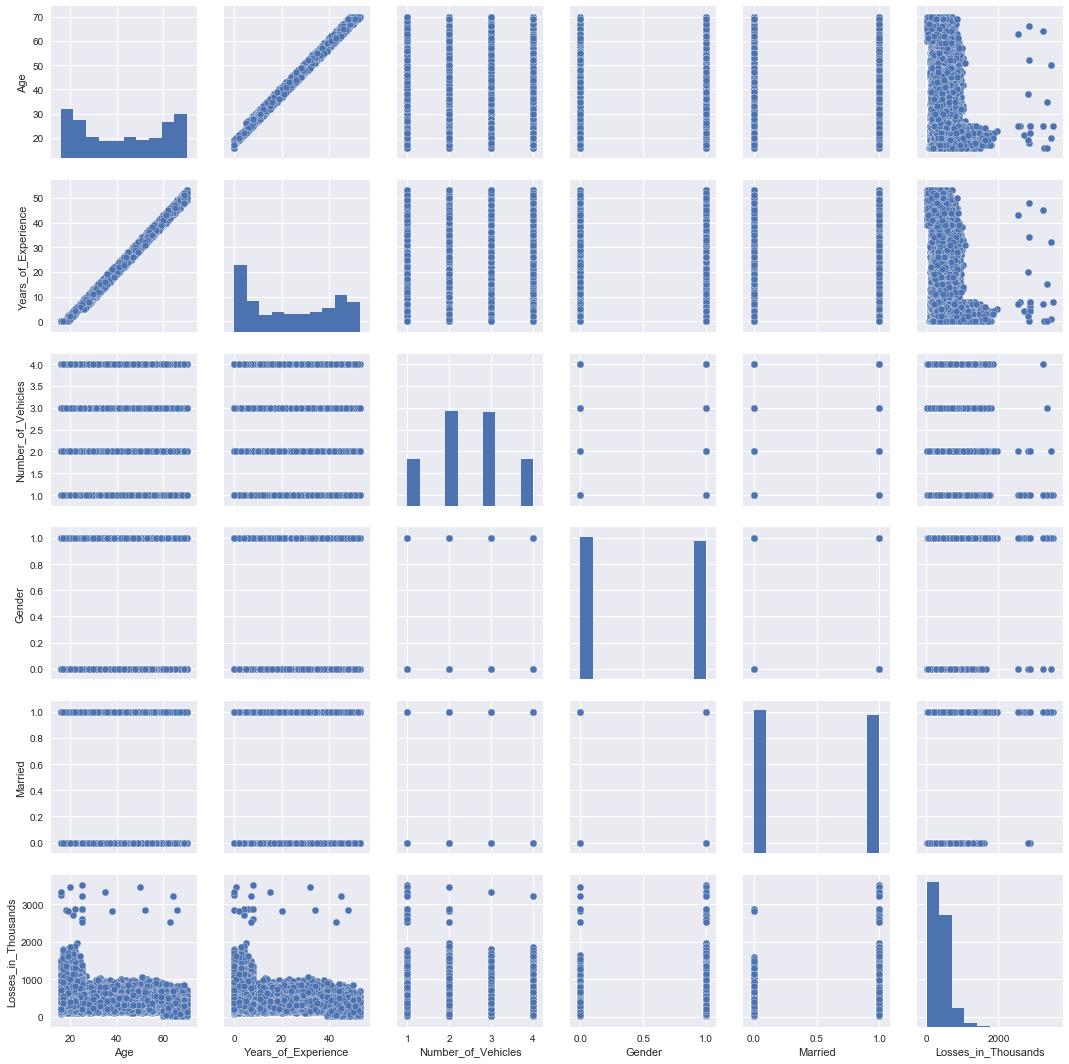

In [20]:
# Pair Plot
sns.pairplot(loss_data)
plt.show()

## Distribution Plot (a.k.a. Histogram)

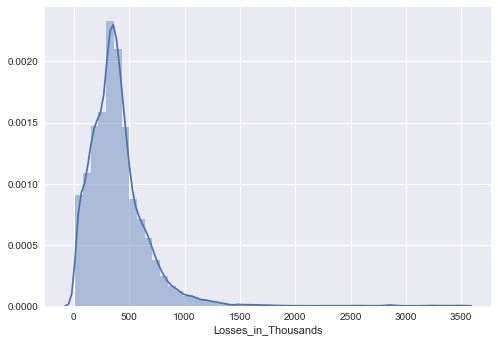

In [18]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(loss_data.Losses_in_Thousands)
plt.show()

## Boxplot

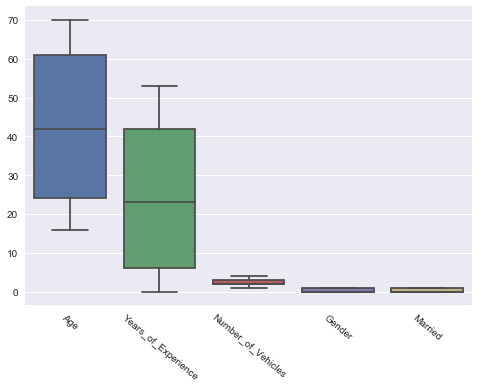

In [23]:
# Boxplot
sns.boxplot(data=loss_data.ix[:,(0,1,2,3,4)], palette="deep")
plt.xticks(rotation=-40)
plt.show()

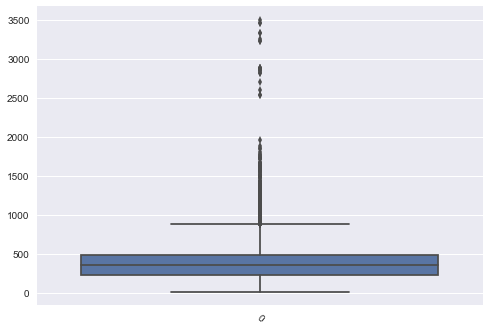

In [20]:
# Boxplot for Losess_in_Thousabds
sns.boxplot(data=loss_data.ix[:,5], palette="deep")
plt.xticks(rotation=-40)
plt.show()

* From the pair and distribution plots you can clearly see that the frequency plot of Losses_in_Thousand variable is skewed. And there is a positive linear relation between Age and Years_of_Experience. <br>
* The box plot of all dependent variables shows the data is normally distributed and well suited for analysis.
* But, the boxplot of Losses_in_Thousand variable shows that there are so many outliers, which has to take care of. <br>
* So, from here we can make linear regression model with outliers or without outliers. But to see the different result I will create two model with and without outliers in Losses_in_Thousand.

<a id="linearreg"></a>
# === Linear Regression ===
<hr>

### With Outliers in Target Variable :  Losses_in_Thousand

First, we have to separate the target variable from all others variable in two separate variables X and y. <br>
**Note:** Only those variables are selected who have a good correlation with **Losses_in_Thousands** i.e. **Age, Years_of_Experience and Married** 

In [87]:
# X contains all other variables
X = loss_data.ix[:,(1,3,4)]
X.head(5)

,Years_of_Experience,Gender,Married
0,5,1,0
1,10,0,1
2,37,1,0
3,31,0,0
4,3,1,1


In [88]:
# y contains Target variables
y = loss_data.ix[:,5]
y.head(5)

0    203.319595
1    402.197302
2    553.132096
3    292.430579
4    246.540576
Name: Losses_in_Thousands, dtype: float64

### Now, we will split the data into : test data and train data, in 70-30% ratio.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [90]:
print("Training Dataset Size:",X_train.shape)
print("Test Dataset Size:",X_test.shape)

Training Dataset Size: (10703, 3)
Test Dataset Size: (4587, 3)


### Building a statistical model using Statsmodels.OLS :

In [91]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Losses_in_Thousands   R-squared:                       0.301
Model:                             OLS   Adj. R-squared:                  0.301
Method:                  Least Squares   F-statistic:                     1536.
Date:                 Fri, 19 Jan 2018   Prob (F-statistic):               0.00
Time:                         03:05:55   Log-Likelihood:                -72350.
No. Observations:                10703   AIC:                         1.447e+05
Df Residuals:                    10699   BIC:                         1.447e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 425.0697      4.346     97.818      0.000     416.552     433.588
Years_of_Experience    -6.1993      0.113    -54.919      0.000      -6.421      -5.978
Gender                 92.7776      4.036     22.989      0.000      84.867     100.688
Married               133.5108      4.037     33.074      0.000     125.598     141.424
==============================================================================
Omnibus:                     7652.758   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368376.880
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      31.149   Cond. No.                         79.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here you can see that the **R Sq.= 0.301** which is too low and saying that there is a correlation between target and predictor variable. So, it will be better to remove outliers from **Losses_in_Thousands** variable and see what happens.

<a id="winsorization"></a>
## Winsorization
<hr>
#### What we going to do is, we will take the upper and lower bounds values from box plot and assigned it to outliers.  So, that all the outliers will be inside the box plot range.

In [26]:
# Extracting Quantiles values, IQR and Upper & Lower Bounds from data.
q = loss_data['Losses_in_Thousands'].quantile([.25, .75]) # Using quantile function for getting Q1(25%) and Q3(75%) quantile
Q1 = q.iloc[0]
Q3 = q.iloc[1]
IQR = Q3-Q1 # Finding interquartile range (IQR)
LB = Q1-1.5 * IQR # Finding Lower bound
UB = Q3+1.5 * IQR # Finding Upper bound

In [27]:
# Counting number of outliers in data. 
loss_data['Losses_in_Thousands'][(loss_data['Losses_in_Thousands'] < LB) | (loss_data['Losses_in_Thousands'] > UB)].count() 

585

In [28]:
# So, there are total 585 outliers in Losses_in_Thousands and we will be assigning all of this to the upper bound 
loss_data['Losses_in_Thousands'][loss_data['Losses_in_Thousands']>UB] = UB
loss_data['Losses_in_Thousands'][loss_data['Losses_in_Thousands']<LB] = LB

C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


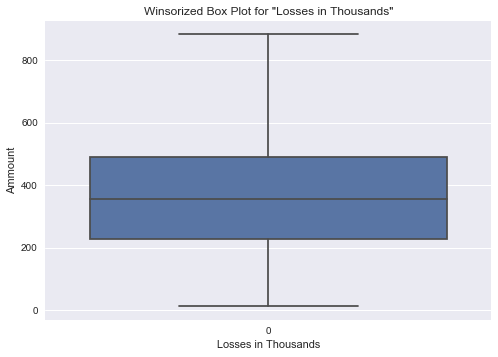

In [29]:
# Boxplot
sns.boxplot(data=loss_data.ix[:,5], palette="deep")
plt.title('Winsorized Box Plot for "Losses in Thousands"')
plt.xlabel('Losses in Thousands')
plt.ylabel('Ammount')
plt.xticks(rotation=0)
plt.show()

#### From the above box plot, you can see that all the outliers are gone and all of them are now converted to the upper bound value of the box plot.

## Linear Regression without Outliers in Target Variable :  Losses_in_Thousand

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [31]:
print("Training Dataset Size:",X_train.shape)
print("Test Dataset Size:",X_test.shape)

Training Dataset Size: (10703, 3)
Test Dataset Size: (4587, 3)


In [32]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Losses_in_Thousands   R-squared:                       0.345
Model:                             OLS   Adj. R-squared:                  0.345
Method:                  Least Squares   F-statistic:                     1882.
Date:                 Thu, 18 Jan 2018   Prob (F-statistic):               0.00
Time:                         22:25:55   Log-Likelihood:                -70082.
No. Observations:                10703   AIC:                         1.402e+05
Df Residuals:                    10699   BIC:                         1.402e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 417.0883      3.516    118.636      0.000     410.197     423.980
Years_of_Experience    -5.6501      0.091    -61.868      0.000      -5.829      -5.471
Gender                 77.8970      3.265     23.858      0.000      71.497      84.297
Married               117.1341      3.266     35.866      0.000     110.732     123.536
==============================================================================
Omnibus:                      303.027   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.980
Skew:                           0.415   Prob(JB):                     7.34e-71
Kurtosis:                       2.816   Cond. No.                         79.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Few key things we can interpret from the above output:

* As you can see the R square value **before winsorization was 0.301** and **after winsorization it becomes 0.345**. Now, since both R square values are not that significant, this is caused due to data. And we can say that this model is not a better fit to the data. But here you can see what difference a non-winsorised and winsorized data can make.

* The variables Years_of_Experience, Gender and Married have significant p-values. And thus we **reject the null hypothesis** for these variables. (i.e. there is no association between features of these variables and our independent variable  **Losses_in_Thousands**).

* Wcan say that these three variables are positively associated with Losses_in_Thousands. 


In [33]:
# Predicted Values (y^) [Values on Best Fit Line] - For `Years of Experience`, Gender and Married
y_pred = results.predict(X_test)
y_pred

7020     240.731977
7922     417.088294
10473    370.370233
5548     348.083373
1985     415.884255
9599     179.785208
12018    476.517590
1080     534.222364
13878    251.718690
1980     285.619131
1190     404.270674
3580     314.182932
292      472.384989
9968     353.733446
12685    533.018325
13053    268.668911
10508    534.222364
10326    510.418031
4424     371.887706
10894    274.318984
9520     224.985796
1897     208.035575
11901    340.915827
14592    478.035063
8529     365.033593
4661     264.536310
9365     308.219425
14948    257.368764
8497     329.615680
12967    123.284473
            ...    
6010     595.169133
2154     336.783226
7689     383.187853
1312     466.734916
4826     123.284473
11160    274.318984
14471    460.771409
6029     387.633887
9467     257.368764
4573     606.469280
2556     415.570821
6513     201.181463
7776     528.572291
12985    528.572291
8021     191.085355
7167     302.569352
5322     476.517590
6090     223.781756
5690     291.582638


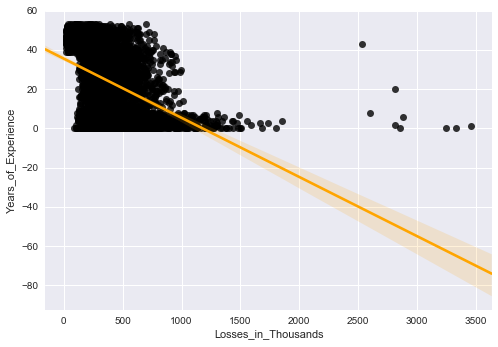

In [96]:
# Plot outputs
sns.regplot(y_test, X_test['Years_of_Experience'], color='black', line_kws={'color':'orange'})
plt.show()

In [35]:
# Error Values [Residuals]
error = y_test - y_pred
error = error.to_frame().reset_index() # Converting Serise to Dataframe. 
# Reset Index will add serial number to dataframe. reset_index() + 100 will start numbering from 100.
error

,index,0
0,7020,66.484254
1,7922,-87.757512
2,10473,-32.325331
3,5548,323.716370
4,1985,95.873789
5,9599,109.596410
6,12018,-13.486052
7,1080,-109.450061
8,13878,-210.128937
9,1980,-230.674287


<a id="assumptions"></a>
# Assumptions of Linear Regression
<hr>
#### Linear models rely upon a lot of assumptions. If assumptions are violated (which they usually are), R-squared and p-values are less reliable. 
Ref: [Ref1](http://people.duke.edu/~rnau/testing.htm), [Ref2](http://r-statistics.co/Assumptions-of-Linear-Regression.html)
#### Assumption-I : Linearity

* To check this linearity assumption we required to plot a scatter **plot between predictor and response variables**.
* If your scatter plot follows a linear pattern (i.e. not a curvilinear pattern) that shows that linearity assumption is met.
* The points should be symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter plot, with a roughly constant variance.
*  In multiple regression models, nonlinearity or nonadditivity may also be revealed by systematic patterns in plots of the residuals versus individual independent variables.
* **Handling non-linearity problem : **
When the linear relationship does not hold we can either transform the data variables like log, exponential transformation or normalisation. Also in such cases we can try to use suitable non linear regression models. 
* We can see a linear pattern in below scatter plot. So, we can say that our assumption is met.

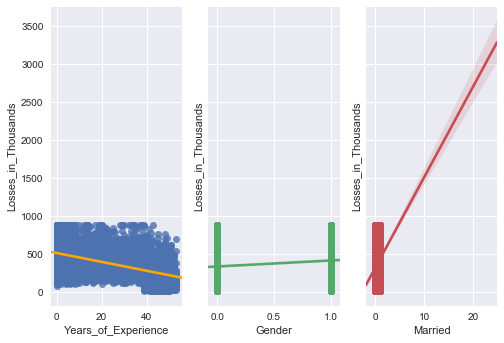

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True)

sns.regplot(x=X_test.iloc[:,1], y=y_test, ax=ax1, line_kws={'color':'orange'})
sns.regplot(x=X_test.iloc[:,2], y=y_test, ax=ax2)
sns.regplot(x=X_test.iloc[:,3], y=y_test, ax=ax3)

plt.show()

#### Assumption-II : Normality of Error
* Here we draw a histogram of the residuals, to examine the normality of the residuals. If the residuals are **not skewed**, that means that the assumption is satisfied. In other words, the histogram of the residuals must be a bell shaped curve.
* So, from below histrogram we can see that there is a Normal distribution of residuals and our assumption of Normality of Error is met.

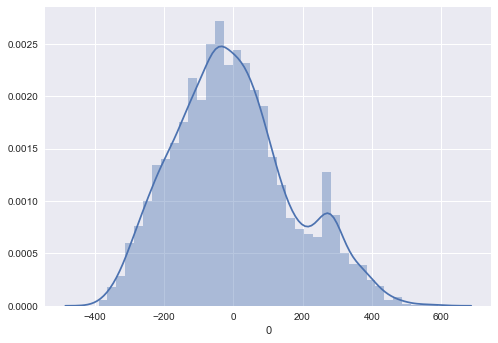

In [58]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(error[0])
plt.show()

#### Assumption-III : Independence of Residuals
* We generally have two types of data: **cross sectional** and **Longitudinal**. 
    * Cross -sectional datasets are those where we collect data on entities only once. For example we collect IQ and GPA information from the students at any one given time (think: camera snap shot).
    * Longitudinal data set is one where we collect GPA information from the same student over time (think: video).
* In cross sectional datasets we do not need to worry about Independence assumption. **It is “assumed” to be met**. Generally this is the Line plot between **Observation No. vs Residuals**.

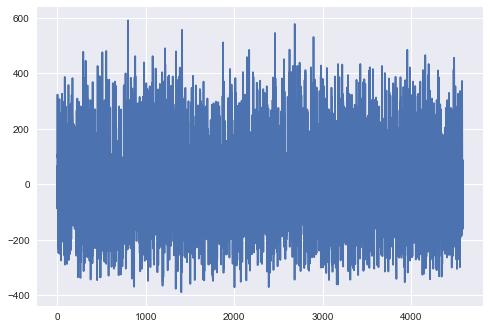

In [59]:
plt.plot(error[0])
plt.show()

#### Assumption-IV : Constant Error Variance / Equal variance of residuals / Homoscedasticity of Residuals
* This is the scatter plot between **Residuals vs Predicted Values (y^) Best Fits** where we examine Constant Error Variance.
* **Note:** In the case of time series data, plot a graph of residuals vs time.
* Be alert for evidence of residuals that grow larger either as a function of time or as a function of the predicted value. What you hope not to see are errors that systematically get larger in one direction by a significant amount.
* Now, the points appear random and the line looks pretty flat, with no increasing or decreasing trend. So, the condition of homoscedasticity can be accepted.

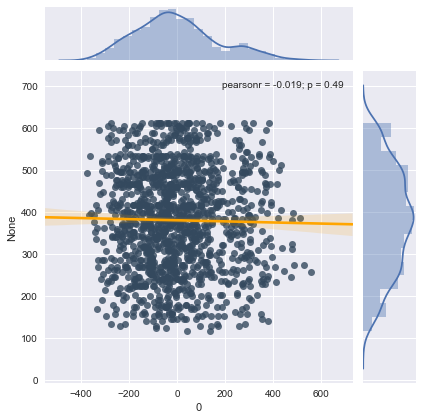

In [65]:
# Basically we have to plot a scatter plot here. But a jointplot using seaborn gives a better prespective.
sns.jointplot(x=error[0], y=y_pred, kind='reg', joint_kws={'color':'#34495e', 'line_kws':{'color':'orange'}})
plt.show()

#### Assumption-V : The mean of Residuals is Zero
* If it is zero (or very close), then this assumption is held true for that model. This is default unless you explicitly make amends, such as setting the intercept term to zero.
* This assumption is met for this model.

In [54]:
error[0].mean()

-0.20975348944357466

<a id="conclusion"></a>
# Conclusion
<hr>
From the above assumptios we can say that the all the assumptions are met. But the R Square **0.345** is very low and there is verry less corelation between the dependent and independent variable. Also, we can say that outliers can affect the corelation on a large scale.

[[Back to Top](#head)]